Imports

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [19]:
df = pd.read_csv('../data/fitbit_activity_data.csv')
df

,date,steps,minutesVeryActive,minutesSedentary,minutesLightlyActive,minutesFairlyActive,calories,activityCalories,daily_activity,activity_start_time,minutesAsleep,minutesAwake,time_in_bed,efficiency,distance,location,sleep_start_time
0,12/07/2021,12866,37,672,269,5,3245,1600,running,14:41,508,20,448,81.379861,0.14062,1,23:09:00
1,13/07/2021,2731,0,907,111,0,2219,467,walking,14:52,428,29,448,86.717956,1.98551,1,23:21:00
2,14/07/2021,2160,0,1055,72,0,2029,309,resting,08:00,435,9,448,83.857431,3.65184,0,23:51:00
3,15/07/2021,5725,23,836,150,18,2734,961,running,14:47,460,18,448,84.370987,4.16213,1,23:16:00
4,16/07/2021,2160,0,1055,72,0,2029,309,resting,08:00,487,16,448,87.181815,4.16213,0,23:17:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,08/12/2021,4493,6,1096,133,22,2487,750,walking,14:43,486,22,448,84.324086,2.51991,1,23:48:00
150,09/12/2021,3827,0,890,163,0,2366,665,walking,14:41,439,11,448,85.170915,3.26652,1,23:28:00
151,10/12/2021,4416,0,1080,179,0,2423,714,walking,14:52,440,17,448,84.440888,2.78230,1,23:51:00
152,11/12/2021,5901,0,815,251,0,2676,1009,walking,14:42,459,26,448,85.272601,3.21054,1,23:42:00


In [20]:
# take only the date and calories columns
df = df[['date', 'calories']]
df

,date,calories
0,12/07/2021,3245
1,13/07/2021,2219
2,14/07/2021,2029
3,15/07/2021,2734
4,16/07/2021,2029
...,...,...
149,08/12/2021,2487
150,09/12/2021,2366
151,10/12/2021,2423
152,11/12/2021,2676


In [21]:
# check info and shape
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      154 non-null    object
 1   calories  154 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


(154, 2)

In [22]:
# convert date column into datetime
df['date'] = pd.to_datetime(df['date'], dayfirst=True)

C:\Users\hasta\AppData\Local\Temp\ipykernel_12512\2936265709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'], dayfirst=True)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      154 non-null    datetime64[ns]
 1   calories  154 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.5 KB


Checking Missing Values

In [24]:
# check for missing values
df.isna().sum()

date        0
calories    0
dtype: int64

In [25]:
# check descriptive statistics
df.describe()

,date,calories
count,154,154.000000
mean,2021-09-26 12:00:00,2511.785714
min,2021-07-12 00:00:00,1758.000000
25%,2021-08-19 06:00:00,2334.000000
50%,2021-09-26 12:00:00,2524.500000
75%,2021-11-03 18:00:00,2714.250000
max,2021-12-12 00:00:00,3256.000000
std,NaN,318.270017


Handling Outliers

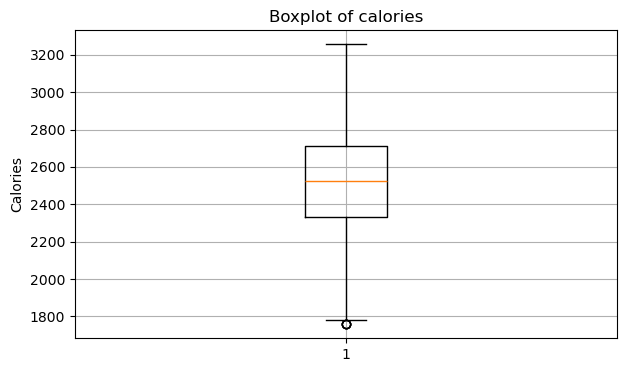

In [26]:
# check for outliers
plt.figure(figsize=(7, 4))
plt.boxplot(df['calories'])
plt.title('Boxplot of calories')
plt.ylabel('Calories')
plt.grid()
plt.show()


In [27]:
# changing outliers in 'calories' column
Q1 = (df['calories']).quantile(0.25)
Q3 = (df['calories']).quantile(0.75)
IQR = Q3 - Q1

maximum = Q3 + (1.5*IQR)
minimum = Q1 - (1.5*IQR)

lower_than = df['calories'] < minimum
more_than = df['calories'] > maximum

df['calories'].mask(lower_than, minimum, inplace=True)
df['calories'].mask(more_than, maximum, inplace=True)

C:\Users\hasta\AppData\Local\Temp\ipykernel_12512\862834354.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['calories'].mask(lower_than, minimum, inplace=True)
C:\Users\hasta\AppData\Local\Temp\ipykernel_12512\862834354.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1763.625' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df['calories'].mask(lower_than, minimum, inplace=True)
C:\Users\hasta

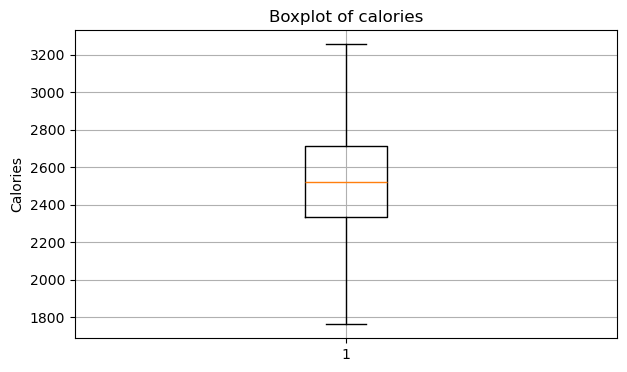

In [28]:
# check for outliers 
plt.figure(figsize=(7, 4))
plt.boxplot(df['calories'])
plt.title('Boxplot of calories')
plt.ylabel('Calories')
plt.grid()
plt.show()

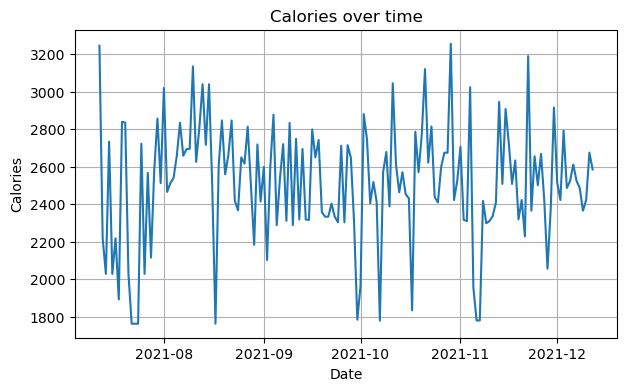

In [29]:
# visualize the calories over time
plt.figure(figsize=(7, 4))
plt.plot(df['date'], df['calories'])
plt.title('Calories over time')
plt.xlabel('Date')
plt.ylabel('Calories')
plt.grid()
plt.show()

Download the Cleaned Data to CSV file

In [30]:
# download the cleaned data to a new csv file
# df.to_csv('data/cleaned_diet_data.csv', index=False)

In [31]:
# make df for snacks data
df['snack_calories'] = df['calories'] * 0.125

df_snacks = df[['date', 'snack_calories']]
df_snacks

C:\Users\hasta\AppData\Local\Temp\ipykernel_12512\347241481.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snack_calories'] = df['calories'] * 0.125


,date,snack_calories
0,2021-07-12,405.625
1,2021-07-13,277.375
2,2021-07-14,253.625
3,2021-07-15,341.750
4,2021-07-16,253.625
...,...,...
149,2021-12-08,310.875
150,2021-12-09,295.750
151,2021-12-10,302.875
152,2021-12-11,334.500


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            154 non-null    datetime64[ns]
 1   calories        154 non-null    float64       
 2   snack_calories  154 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.7 KB


In [33]:
df_snacks.to_csv('../data/cleaned_fitbit_data_snacks.csv', index=False)